In [1]:
import json
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
listings_json = json.load(open("../data/aggregated.json"))

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
def get_area(area):
    if area == None or isinstance(area, str):
        return np.nan
    else:
        return area

In [3]:
def get_bed(bed):
    if bed == None or isinstance(bed, str):
        return np.nan
    else:
        return bed

In [4]:
def remove_nonfloat(cat):
    if cat == None or isinstance(cat, str) or np.isnan(cat):
        return 0
    else:
        return cat

In [78]:
df = pd.DataFrame(listings_json)
df['area'] = df['area'].apply(remove_nonfloat)
df['bed'] = df['bed'].apply(remove_nonfloat)
df['bath'] = df['bath'].apply(remove_nonfloat)
df['price'] = df['price'].apply(remove_nonfloat)
df['laundry'] = df['laundry'].apply(remove_nonfloat)
df['pets'] = df['pets'].apply(remove_nonfloat)
df['parking'] = df['parking'].apply(remove_nonfloat)
df.head()

,address,price,bed,bath,area,company,neighborhood,laundry,pets,parking,utilities,property_type,year_built,description,images
0,3050 Birch Hollow Dr,1095.0,2.0,1.0,876.0,None,None,1.0,1.0,1.0,[],apartment,NaN,This bedroom apartments includes:\n\n→ Contemp...,[https://images.craigslist.org/00S0S_8ZkasrSZ6...
1,912 Rose Ave,2000.0,4.0,2.5,2000.0,None,None,1.0,1.0,1.0,[],house,NaN,"Stunning Ann Arbor home, perfect family house ...",[https://images.craigslist.org/00Y0Y_4tey2xf24...
2,None,695.0,3.0,2.0,0.0,None,None,1.0,0.0,1.0,[],apartment,NaN,"AWESOME Affordable. This stunning 3 bedroom, 1...",[]
3,1505 Natalie Lane near Kipling Drive,1385.0,1.0,1.0,800.0,None,None,1.0,1.0,1.0,[],apartment,NaN,Have you heard about our Stars & Stripes progr...,[https://images.craigslist.org/00p0p_1PnkFaSsW...
4,1505 Natalie Lane near Kipling Drive,1185.0,1.0,1.0,800.0,None,None,1.0,1.0,1.0,[],apartment,NaN,Have you heard about our Stars & Stripes progr...,[https://images.craigslist.org/00k0k_7n7PgfXF5...


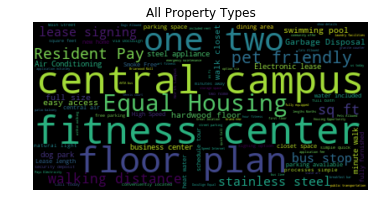

In [79]:
stopwords = set(STOPWORDS)
stopwords.update(["Ann", "Arbor", "apartment", "living", "duplex", "condo", "room", "house", "washer", "dryer", "bedroom", "contact", "info", "University", "Michigan", "Month"])

text = ""

for word in df.description:
    text += word

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("All Property Types")
plt.show()

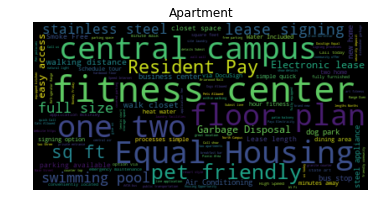

In [80]:
pt = df.groupby('property_type')

text_apartment = ""

for word in pt.get_group('apartment').description:
    text_apartment += word

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords).generate(text_apartment)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Apartment")
plt.show()

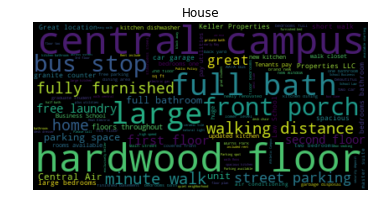

In [81]:
text_house = ""

for word in pt.get_group('house').description:
    text_house += word

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords).generate(text_house)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("House")
plt.show()

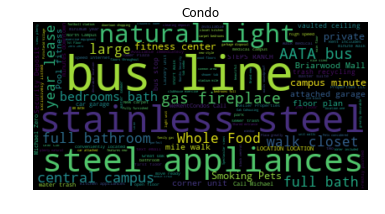

In [82]:
text_condo = ""

for word in pt.get_group('condo').description:
    text_condo += word

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords).generate(text_condo)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Condo")
plt.show()

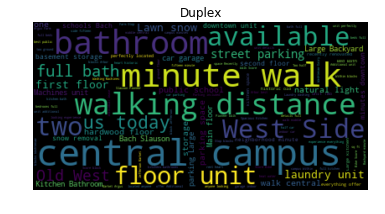

In [83]:
text_duplex = ""

for word in pt.get_group('duplex').description:
    text_duplex += word

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords).generate(text_duplex)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Duplex")
plt.show()